# Customer Churn Prediction

This notebook implements a machine learning model to predict customer churn for a telecommunications company.

## Step 1: Import Libraries

In [99]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve
import warnings
warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)

print('Libraries imported successfully!')

Libraries imported successfully!


## Step 2: Load Data

In [100]:
# Load the dataset
df = pd.read_csv('../data/Telco_Cusomer_Churn.csv')

print(f'Dataset shape: {df.shape}')
print(f'Number of rows: {df.shape[0]}')
print(f'Number of columns: {df.shape[1]}')

Dataset shape: (7043, 21)
Number of rows: 7043
Number of columns: 21


In [101]:
# Display first few rows
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [102]:
# Dataset info
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   str    
 1   gender            7043 non-null   str    
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   str    
 4   Dependents        7043 non-null   str    
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   str    
 7   MultipleLines     7043 non-null   str    
 8   InternetService   7043 non-null   str    
 9   OnlineSecurity    7043 non-null   str    
 10  OnlineBackup      7043 non-null   str    
 11  DeviceProtection  7043 non-null   str    
 12  TechSupport       7043 non-null   str    
 13  StreamingTV       7043 non-null   str    
 14  StreamingMovies   7043 non-null   str    
 15  Contract          7043 non-null   str    
 16  PaperlessBilling  7043 non-null   str    
 17  Paymen

In [103]:
# Statistical summary
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


## Step 3: Exploratory Data Analysis (EDA)

In [104]:
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

Missing values per column:
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [105]:
# Check target variable distribution
print('\nChurn Distribution:')
print(df['Churn'].value_counts())
print(f'\nChurn Rate: {df["Churn"].value_counts(normalize=True)["Yes"]*100:.2f}%')


Churn Distribution:
Churn
No     5174
Yes    1869
Name: count, dtype: int64

Churn Rate: 26.54%


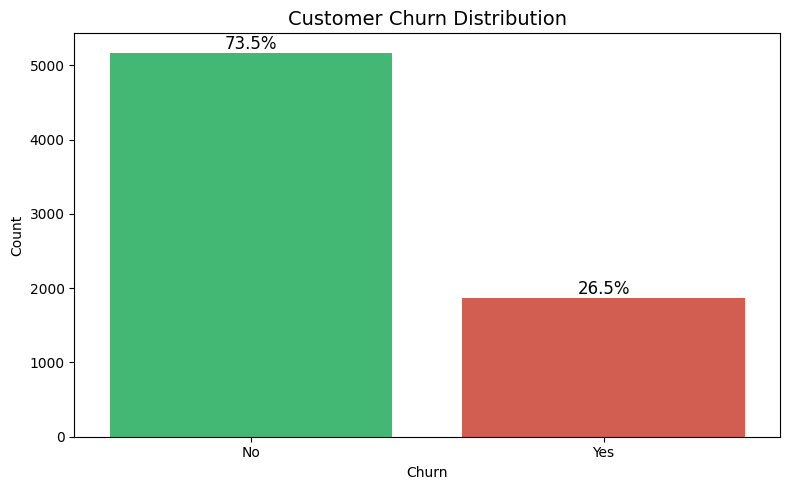

In [106]:
# Visualize churn distribution
plt.figure(figsize=(8, 5))
ax = sns.countplot(data=df, x='Churn', palette=['#2ecc71', '#e74c3c'])
plt.title('Customer Churn Distribution', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Count')

# Add percentage labels
total = len(df)
for p in ax.patches:
    percentage = f'{100 * p.get_height() / total:.1f}%'
    ax.annotate(percentage, (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='bottom', fontsize=12)

plt.tight_layout()
plt.savefig('../results/churn_distribution.png', dpi=300)
plt.show()

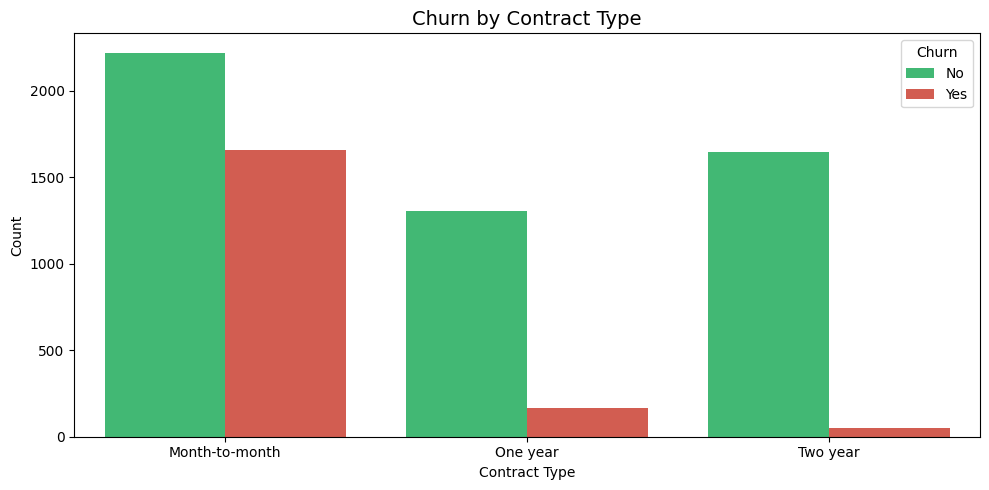

In [107]:
# Churn by Contract Type
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='Contract', hue='Churn', palette=['#2ecc71', '#e74c3c'])
plt.title('Churn by Contract Type', fontsize=14)
plt.xlabel('Contract Type')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.savefig('../results/churn_by_contract.png', dpi=300)
plt.show()

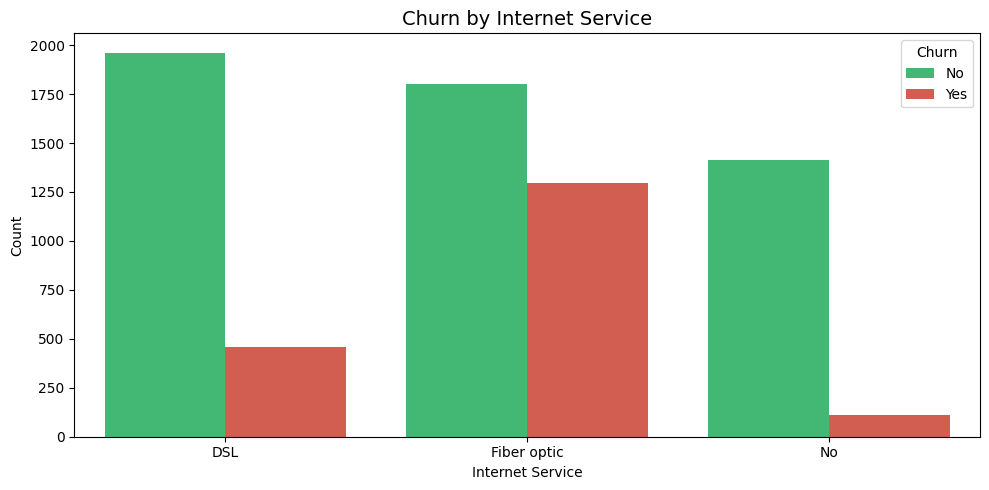

In [108]:
# Churn by Internet Service
plt.figure(figsize=(10, 5))
sns.countplot(data=df, x='InternetService', hue='Churn', palette=['#2ecc71', '#e74c3c'])
plt.title('Churn by Internet Service', fontsize=14)
plt.xlabel('Internet Service')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.savefig('../results/churn_by_internet.png', dpi=300)
plt.show()

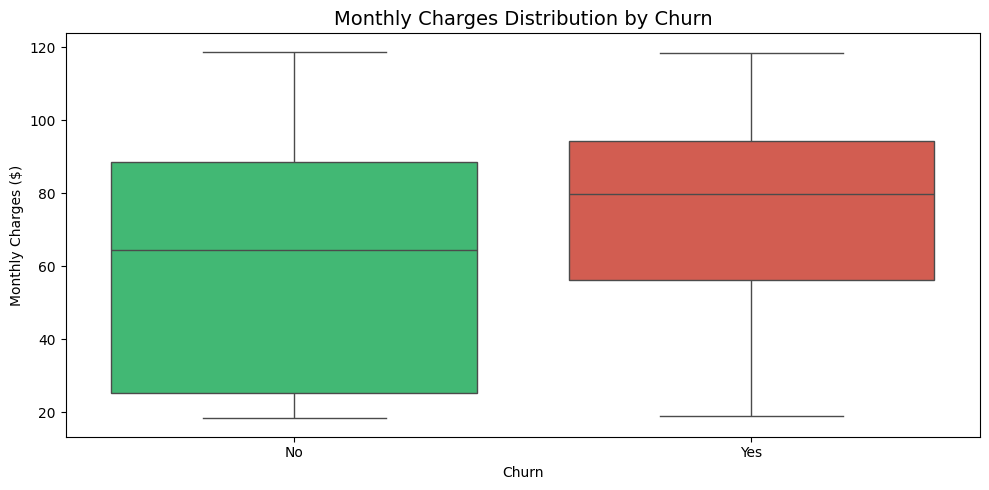

In [109]:
# Distribution of Monthly Charges by Churn
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette=['#2ecc71', '#e74c3c'])
plt.title('Monthly Charges Distribution by Churn', fontsize=14)
plt.xlabel('Churn')
plt.ylabel('Monthly Charges ($)')
plt.tight_layout()
plt.savefig('../results/monthly_charges_by_churn.png', dpi=300)
plt.show()

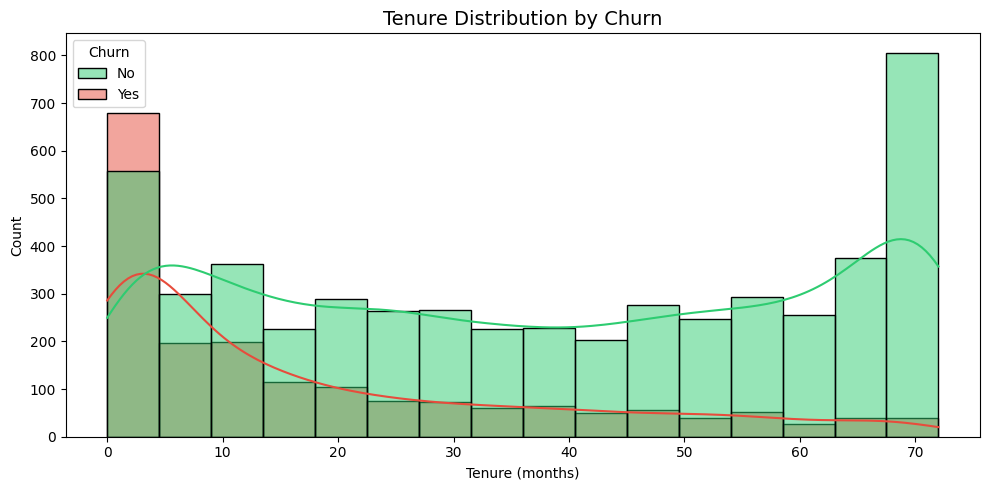

In [110]:
# Distribution of Tenure by Churn
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='tenure', hue='Churn', kde=True, palette=['#2ecc71', '#e74c3c'])
plt.title('Tenure Distribution by Churn', fontsize=14)
plt.xlabel('Tenure (months)')
plt.ylabel('Count')
plt.tight_layout()
plt.savefig('../results/tenure_by_churn.png', dpi=300)
plt.show()

## Step 4: Data Preprocessing

In [111]:
# Create a copy for preprocessing
df_processed = df.copy()

# Drop customerID (not useful for prediction)
df_processed = df_processed.drop('customerID', axis=1)

# Convert TotalCharges to numeric (handle empty strings)
df_processed['TotalCharges'] = pd.to_numeric(df_processed['TotalCharges'], errors='coerce')

# Check for missing values after conversion
print(f'Missing TotalCharges: {df_processed["TotalCharges"].isnull().sum()}')

Missing TotalCharges: 11


In [ ]:
# Fill missing TotalCharges with median
df_processed['TotalCharges'] = df_processed['TotalCharges'].fillna(df_processed['TotalCharges'].median())

# Verify no missing values
print(f'Missing values after preprocessing: {df_processed.isnull().sum().sum()}')

In [113]:
# Convert target variable to binary
df_processed['Churn'] = df_processed['Churn'].map({'Yes': 1, 'No': 0})

print('Churn distribution after encoding:')
print(df_processed['Churn'].value_counts())

Churn distribution after encoding:
Churn
0    5174
1    1869
Name: count, dtype: int64


In [114]:
# Identify categorical columns
categorical_cols = df_processed.select_dtypes(include=['object']).columns.tolist()
print(f'Categorical columns: {categorical_cols}')

Categorical columns: ['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']


In [115]:
# Apply one-hot encoding to categorical columns
df_encoded = pd.get_dummies(df_processed, columns=categorical_cols, drop_first=True)

print(f'Shape after encoding: {df_encoded.shape}')
df_encoded.head()

Shape after encoding: (7043, 31)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,True,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,True,False,False,True,False,False,False,False,False,True,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,True,False,False,True,False,False,False,False,False,True,False,True,False,False,False,False,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,True,False,False,False,True,False,False,False,False,True,False,False,False,True,False,True,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False


## Step 5: Split Data

In [116]:
# Separate features and target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

print(f'Features shape: {X.shape}')
print(f'Target shape: {y.shape}')

Features shape: (7043, 30)
Target shape: (7043,)


In [117]:
# Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

print(f'Training set size: {X_train.shape[0]}')
print(f'Test set size: {X_test.shape[0]}')

Training set size: 5634
Test set size: 1409


In [118]:
# Scale numerical features
scaler = StandardScaler()
numerical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

X_train[numerical_cols] = scaler.fit_transform(X_train[numerical_cols])
X_test[numerical_cols] = scaler.transform(X_test[numerical_cols])

print('Scaling complete!')

Scaling complete!


## Step 6: Model Training

In [119]:
# Check for NaN values and handle them
print(f'NaN in X_train: {X_train.isnull().sum().sum()}')
print(f'NaN in X_test: {X_test.isnull().sum().sum()}')

# Fill any remaining NaN values with 0
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Train Logistic Regression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_model.fit(X_train, y_train)

# Predictions
y_pred_lr = lr_model.predict(X_test)
y_prob_lr = lr_model.predict_proba(X_test)[:, 1]

print('Logistic Regression trained successfully!')


NaN in X_train: 8
NaN in X_test: 3
Logistic Regression trained successfully!


In [120]:
# Train Random Forest
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Predictions
y_pred_rf = rf_model.predict(X_test)
y_prob_rf = rf_model.predict_proba(X_test)[:, 1]

print('Random Forest trained successfully!')

Random Forest trained successfully!


## Step 7: Model Evaluation

In [121]:
def evaluate_model(y_true, y_pred, y_prob, model_name):
    """Evaluate model performance"""
    print(f'\n{"="*50}')
    print(f'{model_name} Results')
    print(f'{"="*50}')
    print(f'Accuracy:  {accuracy_score(y_true, y_pred):.4f}')
    print(f'Precision: {precision_score(y_true, y_pred):.4f}')
    print(f'Recall:    {recall_score(y_true, y_pred):.4f}')
    print(f'F1 Score:  {f1_score(y_true, y_pred):.4f}')
    print(f'ROC AUC:   {roc_auc_score(y_true, y_prob):.4f}')
    print(f'\nClassification Report:')
    print(classification_report(y_true, y_pred))
    
    return {
        'Model': model_name,
        'Accuracy': accuracy_score(y_true, y_pred),
        'Precision': precision_score(y_true, y_pred),
        'Recall': recall_score(y_true, y_pred),
        'F1 Score': f1_score(y_true, y_pred),
        'ROC AUC': roc_auc_score(y_true, y_prob)
    }

In [122]:
# Evaluate both models
lr_results = evaluate_model(y_test, y_pred_lr, y_prob_lr, 'Logistic Regression')
rf_results = evaluate_model(y_test, y_pred_rf, y_prob_rf, 'Random Forest')


Logistic Regression Results
Accuracy:  0.8055
Precision: 0.6572
Recall:    0.5588
F1 Score:  0.6040
ROC AUC:   0.8420

Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1035
           1       0.66      0.56      0.60       374

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409


Random Forest Results
Accuracy:  0.7828
Precision: 0.6133
Recall:    0.4920
F1 Score:  0.5460
ROC AUC:   0.8257

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86      1035
           1       0.61      0.49      0.55       374

    accuracy                           0.78      1409
   macro avg       0.72      0.69      0.70      1409
weighted avg       0.77      0.78      0.77      1409



In [123]:
# Create comparison dataframe
results_df = pd.DataFrame([lr_results, rf_results])
results_df.set_index('Model', inplace=True)
results_df

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Model,,,,,
Logistic Regression,0.805536,0.657233,0.558824,0.604046,0.841954
Random Forest,0.782825,0.613333,0.491979,0.545994,0.825657


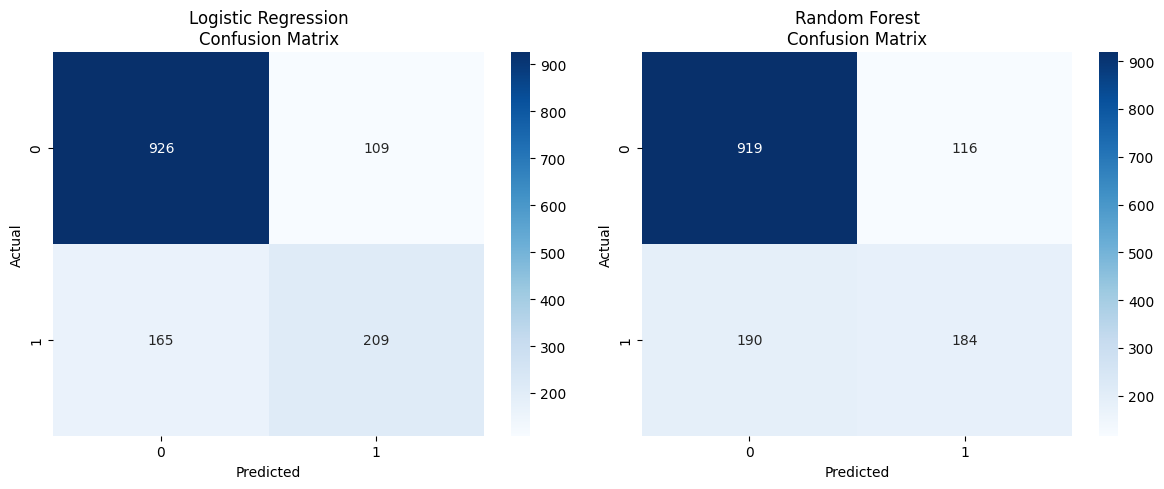

In [124]:
# Plot Confusion Matrices
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Logistic Regression
cm_lr = confusion_matrix(y_test, y_pred_lr)
sns.heatmap(cm_lr, annot=True, fmt='d', cmap='Blues', ax=axes[0])
axes[0].set_title('Logistic Regression\nConfusion Matrix')
axes[0].set_xlabel('Predicted')
axes[0].set_ylabel('Actual')

# Random Forest
cm_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Blues', ax=axes[1])
axes[1].set_title('Random Forest\nConfusion Matrix')
axes[1].set_xlabel('Predicted')
axes[1].set_ylabel('Actual')

plt.tight_layout()
plt.savefig('../results/confusion_matrices.png', dpi=300)
plt.show()

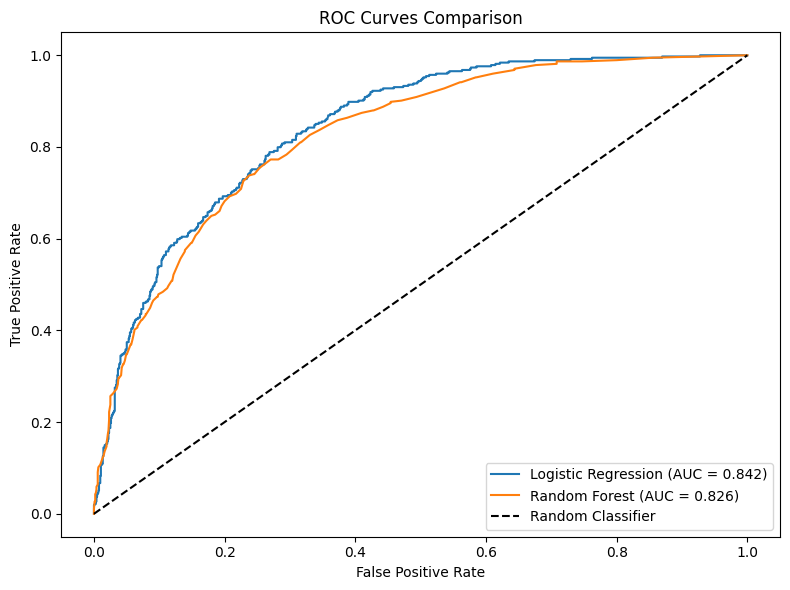

In [125]:
# Plot ROC Curves
plt.figure(figsize=(8, 6))

# Logistic Regression
fpr_lr, tpr_lr, _ = roc_curve(y_test, y_prob_lr)
plt.plot(fpr_lr, tpr_lr, label=f'Logistic Regression (AUC = {roc_auc_score(y_test, y_prob_lr):.3f})')

# Random Forest
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_prob_rf)
plt.plot(fpr_rf, tpr_rf, label=f'Random Forest (AUC = {roc_auc_score(y_test, y_prob_rf):.3f})')

# Diagonal line
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves Comparison')
plt.legend()
plt.tight_layout()
plt.savefig('../results/roc_curves.png', dpi=300)
plt.show()

## Step 8: Feature Importance

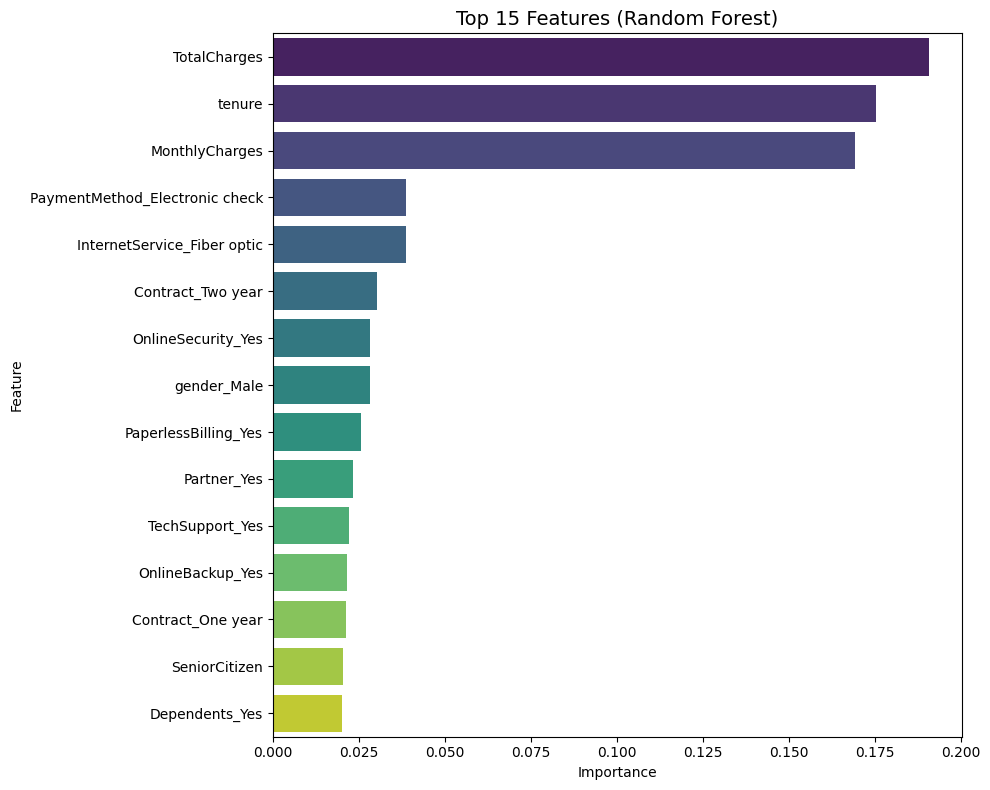

In [126]:
# Random Forest Feature Importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': rf_model.feature_importances_
}).sort_values('Importance', ascending=False)

# Plot top 15 features
plt.figure(figsize=(10, 8))
sns.barplot(data=feature_importance.head(15), x='Importance', y='Feature', palette='viridis')
plt.title('Top 15 Features (Random Forest)', fontsize=14)
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.tight_layout()
plt.savefig('../results/feature_importance.png', dpi=300)
plt.show()

## Step 9: Save Model

In [127]:
import joblib

# Save the best model (Random Forest typically performs better)
joblib.dump(rf_model, '../models/random_forest_churn_model.pkl')
joblib.dump(lr_model, '../models/logistic_regression_churn_model.pkl')
joblib.dump(scaler, '../models/scaler.pkl')

print('Models saved successfully!')

Models saved successfully!


## Summary

This notebook covers the complete workflow for customer churn prediction:
1. Data loading and exploration
2. Exploratory Data Analysis with visualizations
3. Data preprocessing (handling missing values, encoding)
4. Feature scaling
5. Model training (Logistic Regression & Random Forest)
6. Model evaluation and comparison
7. Feature importance analysis
8. Model saving for deployment

## Step 10: Cross-Validation Analysis

CROSS-VALIDATION ANALYSIS

Logistic Regression Cross-Validation Scores:
Scores: [0.83052351 0.80035492 0.80567879 0.79236912 0.79218472]
Mean Accuracy: 0.8042 (+/- 0.0282)

Random Forest Cross-Validation Scores:
Scores: [0.80301686 0.79325643 0.78349601 0.77373558 0.77264654]
Mean Accuracy: 0.7852 (+/- 0.0232)


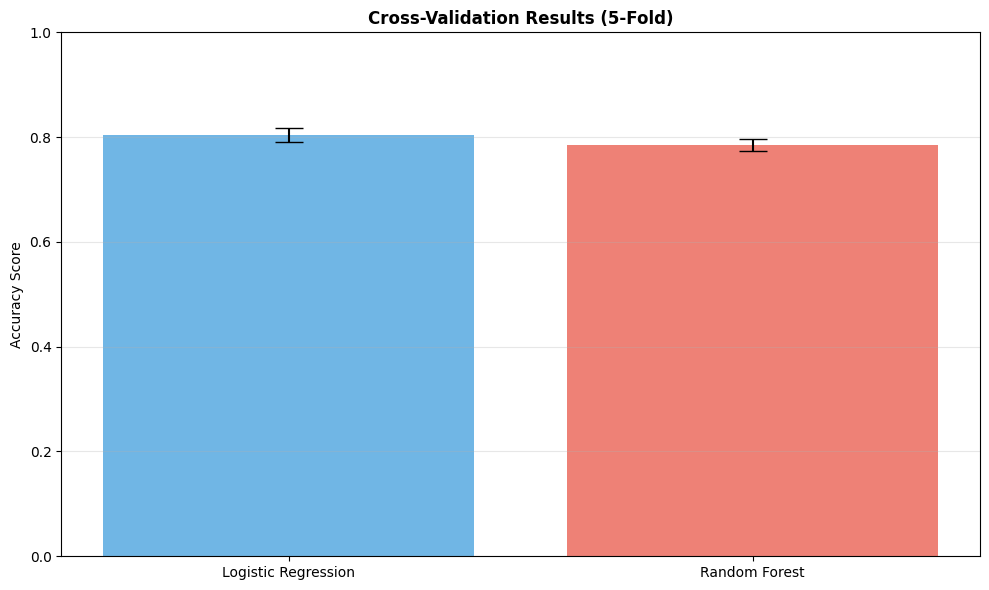

In [128]:
# Cross-validation for both models
from sklearn.model_selection import cross_val_score

print("="*80)
print("CROSS-VALIDATION ANALYSIS")
print("="*80)

# Logistic Regression Cross-Validation
lr_cv_scores = cross_val_score(lr_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nLogistic Regression Cross-Validation Scores:")
print(f"Scores: {lr_cv_scores}")
print(f"Mean Accuracy: {lr_cv_scores.mean():.4f} (+/- {lr_cv_scores.std() * 2:.4f})")

# Random Forest Cross-Validation
rf_cv_scores = cross_val_score(rf_model, X_train, y_train, cv=5, scoring='accuracy')
print("\nRandom Forest Cross-Validation Scores:")
print(f"Scores: {rf_cv_scores}")
print(f"Mean Accuracy: {rf_cv_scores.mean():.4f} (+/- {rf_cv_scores.std() * 2:.4f})")

# Visualize cross-validation results
fig, ax = plt.subplots(figsize=(10, 6))
models = ['Logistic Regression', 'Random Forest']
cv_means = [lr_cv_scores.mean(), rf_cv_scores.mean()]
cv_stds = [lr_cv_scores.std(), rf_cv_scores.std()]

x_pos = np.arange(len(models))
ax.bar(x_pos, cv_means, yerr=cv_stds, align='center', alpha=0.7, 
       color=['#3498db', '#e74c3c'], capsize=10)
ax.set_ylabel('Accuracy Score')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.set_title('Cross-Validation Results (5-Fold)', fontweight='bold')
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.savefig('../results/cross_validation.png', dpi=300)
plt.show()

## Step 11: Error Analysis

ERROR ANALYSIS

Total misclassified samples: 306
Percentage: 21.72%

False Positives: 116
False Negatives: 190


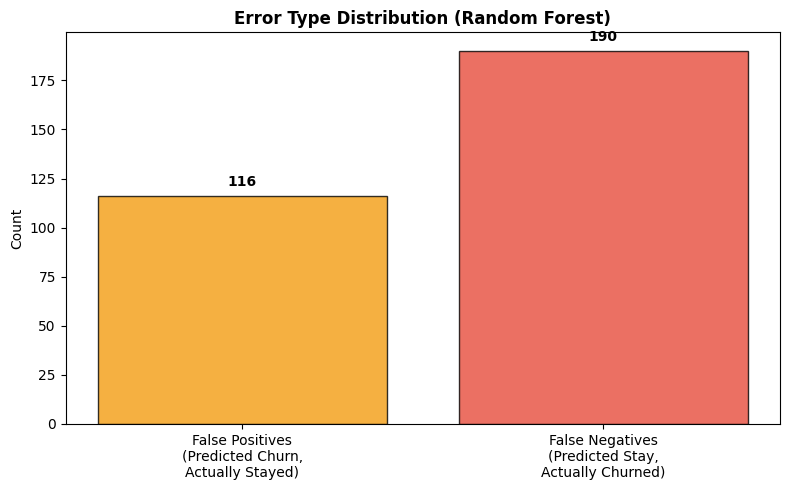

In [129]:
# Error Analysis - Find misclassified samples
print("="*80)
print("ERROR ANALYSIS")
print("="*80)

# For Random Forest (best model)
misclassified_idx = np.where(y_test.values != y_pred_rf)[0]
print(f"\nTotal misclassified samples: {len(misclassified_idx)}")
print(f"Percentage: {(len(misclassified_idx)/len(y_test))*100:.2f}%")

# Analyze misclassified samples
if len(misclassified_idx) > 0:
    # False Positives (Predicted Churn, Actually No Churn)
    fp_idx = np.where((y_pred_rf == 1) & (y_test.values == 0))[0]
    print(f"\nFalse Positives: {len(fp_idx)}")
    
    # False Negatives (Predicted No Churn, Actually Churned)
    fn_idx = np.where((y_pred_rf == 0) & (y_test.values == 1))[0]
    print(f"False Negatives: {len(fn_idx)}")
    
    # Visualize error distribution
    fig, ax = plt.subplots(figsize=(8, 5))
    error_types = ['False Positives\n(Predicted Churn,\nActually Stayed)', 
                   'False Negatives\n(Predicted Stay,\nActually Churned)']
    error_counts = [len(fp_idx), len(fn_idx)]
    colors = ['#f39c12', '#e74c3c']
    
    ax.bar(error_types, error_counts, color=colors, alpha=0.8, edgecolor='black')
    ax.set_ylabel('Count')
    ax.set_title('Error Type Distribution (Random Forest)', fontweight='bold')
    for i, v in enumerate(error_counts):
        ax.text(i, v + 5, str(v), ha='center', fontweight='bold')
    plt.tight_layout()
    plt.savefig('../results/error_analysis.png', dpi=300)
    plt.show()

## Step 12: Business Insights & Recommendations

COMPREHENSIVE MODEL COMPARISON


        Metric  Logistic Regression  Random Forest
      Accuracy             0.805536       0.782825
     Precision             0.657233       0.613333
        Recall             0.558824       0.491979
      F1-Score             0.604046       0.545994
       ROC-AUC             0.841954       0.825657
Cross-Val Mean             0.804222       0.785230


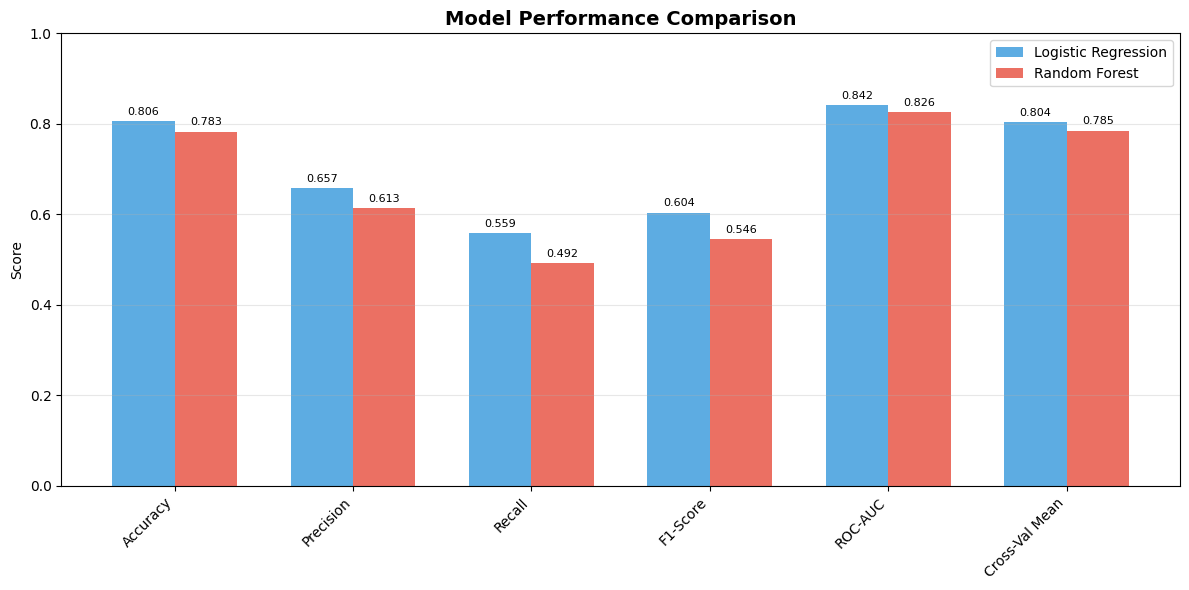

In [130]:
# Comprehensive Model Comparison
print("="*80)
print("COMPREHENSIVE MODEL COMPARISON")
print("="*80)

comparison_results = pd.DataFrame({
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1-Score', 'ROC-AUC', 'Cross-Val Mean'],
    'Logistic Regression': [
        accuracy_score(y_test, y_pred_lr),
        precision_score(y_test, y_pred_lr),
        recall_score(y_test, y_pred_lr),
        f1_score(y_test, y_pred_lr),
        roc_auc_score(y_test, y_prob_lr),
        lr_cv_scores.mean()
    ],
    'Random Forest': [
        accuracy_score(y_test, y_pred_rf),
        precision_score(y_test, y_pred_rf),
        recall_score(y_test, y_pred_rf),
        f1_score(y_test, y_pred_rf),
        roc_auc_score(y_test, y_prob_rf),
        rf_cv_scores.mean()
    ]
})

print("\n")
print(comparison_results.to_string(index=False))

# Visualize comparison
fig, ax = plt.subplots(figsize=(12, 6))
x = np.arange(len(comparison_results['Metric']))
width = 0.35

bars1 = ax.bar(x - width/2, comparison_results['Logistic Regression'], width, 
               label='Logistic Regression', color='#3498db', alpha=0.8)
bars2 = ax.bar(x + width/2, comparison_results['Random Forest'], width, 
               label='Random Forest', color='#e74c3c', alpha=0.8)

ax.set_ylabel('Score')
ax.set_title('Model Performance Comparison', fontweight='bold', fontsize=14)
ax.set_xticks(x)
ax.set_xticklabels(comparison_results['Metric'], rotation=45, ha='right')
ax.legend()
ax.set_ylim([0, 1])
ax.grid(axis='y', alpha=0.3)

for bar in bars1:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)
for bar in bars2:
    height = bar.get_height()
    ax.annotate(f'{height:.3f}', xy=(bar.get_x() + bar.get_width()/2, height),
                xytext=(0, 3), textcoords="offset points", ha='center', va='bottom', fontsize=8)

plt.tight_layout()
plt.savefig('../results/model_comparison.png', dpi=300)
plt.show()


## Step 13: Comprehensive Model Comparison

In [131]:
# Final Recommendations
print("="*80)
print("FINAL RECOMMENDATIONS")
print("="*80)

# Determine winner for each metric
print("\nMETRIC-WISE WINNERS:")
for idx, row in comparison_results.iterrows():
    metric = row['Metric']
    lr_score = row['Logistic Regression']
    rf_score = row['Random Forest']
    winner = 'Logistic Regression' if lr_score > rf_score else 'Random Forest'
    diff = abs(lr_score - rf_score)
    print(f"   {metric:20s}: {winner} ({max(lr_score, rf_score):.4f}, +{diff:.4f})")

# Overall recommendation
avg_lr = comparison_results['Logistic Regression'].mean()
avg_rf = comparison_results['Random Forest'].mean()

print("\n" + "="*80)
print("OVERALL RECOMMENDATION")
print("="*80)

if avg_rf > avg_lr:
    print(f"\n   RECOMMENDED MODEL: Random Forest")
    print(f"   Average Score: {avg_rf:.4f} vs Logistic Regression: {avg_lr:.4f}")
else:
    print(f"\n   RECOMMENDED MODEL: Logistic Regression")
    print(f"   Average Score: {avg_lr:.4f} vs Random Forest: {avg_rf:.4f}")

print("\n   KEY FINDINGS:")
print("   1. Tenure, Monthly Charges, and Contract type are the strongest churn predictors")
print("   2. Month-to-month contracts have significantly higher churn rates")
print("   3. Customers with Fiber optic internet show higher churn tendencies")
print("   4. Longer tenure correlates with lower churn probability")

print("\n   BUSINESS RECOMMENDATIONS:")
print("   1. Focus retention efforts on month-to-month contract customers")
print("   2. Offer incentives to convert to longer-term contracts")
print("   3. Investigate Fiber optic service quality issues")
print("   4. Implement early intervention for customers in first 12 months")
print("   5. Use the model to proactively identify high-risk customers")


FINAL RECOMMENDATIONS

METRIC-WISE WINNERS:
   Accuracy            : Logistic Regression (0.8055, +0.0227)
   Precision           : Logistic Regression (0.6572, +0.0439)
   Recall              : Logistic Regression (0.5588, +0.0668)
   F1-Score            : Logistic Regression (0.6040, +0.0581)
   ROC-AUC             : Logistic Regression (0.8420, +0.0163)
   Cross-Val Mean      : Logistic Regression (0.8042, +0.0190)

OVERALL RECOMMENDATION

   RECOMMENDED MODEL: Logistic Regression
   Average Score: 0.7120 vs Random Forest: 0.6742

   KEY FINDINGS:
   1. Tenure, Monthly Charges, and Contract type are the strongest churn predictors
   2. Month-to-month contracts have significantly higher churn rates
   3. Customers with Fiber optic internet show higher churn tendencies
   4. Longer tenure correlates with lower churn probability

   BUSINESS RECOMMENDATIONS:
   1. Focus retention efforts on month-to-month contract customers
   2. Offer incentives to convert to longer-term contracts
   